In [8]:
import mesa_reader as mr
import numpy as np


import sys
import webplotdigitizer as wpd

from matplotlib import colors
from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

keV2erg = 1.60218e-9
GeV2keV = 1e6
Rsol2cm = 6.957e10
K2keV = 0.086/1e6
m_u = .931*GeV2keV
g2GeV = 5.61e23
cm2GeVinv = 1/1.98e-14
GeV2sinv = 1.52e24
alpha_EM = 1./137
pc2cm = 3.086e+18
keV2difflum = keV2erg*GeV2sinv/GeV2keV # converts keV to erg/s/keV

In [9]:
mass = 1.3
rgnum = str(int(10*mass-2))

base = '/scratch/bsafdi_root/bsafdi/dessert/MESA_models/RG/RG'+rgnum+'_v4/'
logs = base + 'LOGS'
history = logs + '/history.data'

h = mr.MesaData(history)
star_age = h.star_age/10.**9
# t_sn = star_age[-1]
# yr_to_sn = (t_sn-star_age)*10**9
mass = h.star_mass
print mass[0]
he_core_mass = h.he_core_mass
c_core_mass = h.c_core_mass
center_h = h.center_h1
center_he = h.center_he4
center_c = h.center_c12
center_o = h.center_o16
center_ne = h.center_ne20
log_Tcore = h.log_center_T
log_Rhocore = h.log_center_Rho
dt = h.log_dt
log_Lcno = h.c_log_eps_burn_cno
log_L3alpha = h.c_log_eps_burn_tri_alfa
eta = h.center_degeneracy # >> 1 for degeneracy
# log_LC = h.c_log_eps_burn_burn_c 
model_num = h.model_number
log_Teff = h.log_Teff
log_L = h.log_L
l = mr.MesaLogDir(logs)
# model_number_plot = np.where(np.abs(yr_to_sn - 1500) < 130)
mns_RG = np.where(eta > 4) # Note this isn't quite right because eta is center
# p = l.profile_data(model_number=model_num[model_number_plot])
# print p.logT

1.3


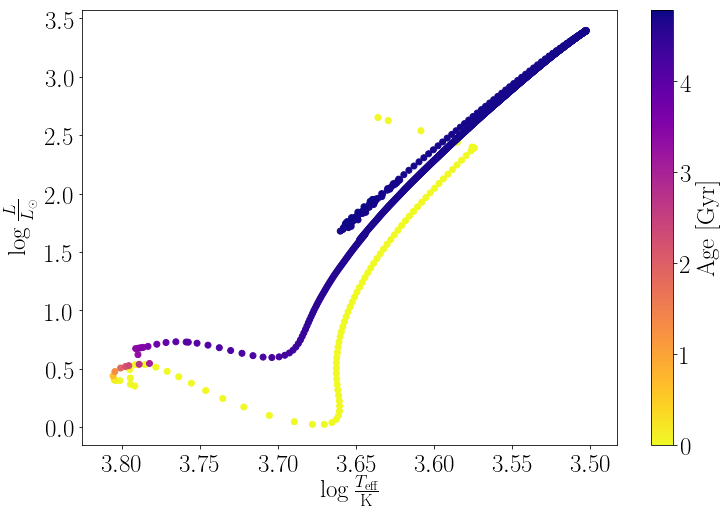

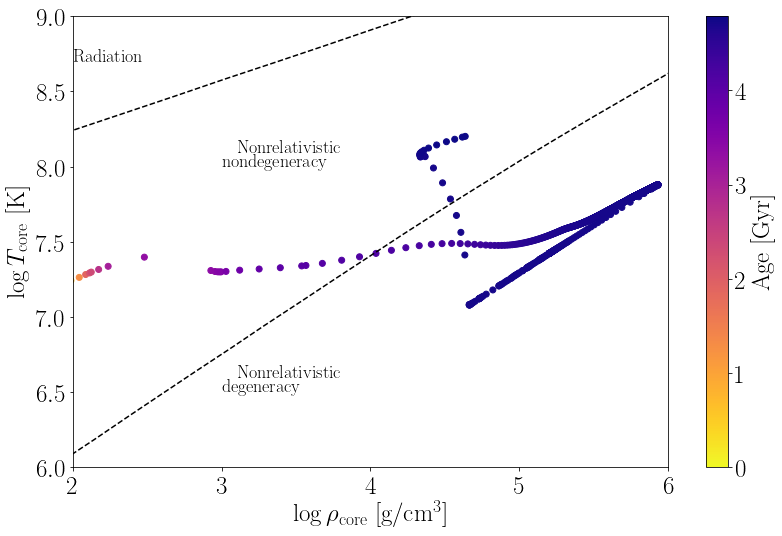

In [16]:
color = star_age
# color = log_L3alpha
cmap = plt.cm.plasma_r

# Maybe add regions of 
plt.figure(1,figsize=(12,8))
model_idxs = np.where(model_num > -1)
plt.scatter(log_Teff, log_L,c=color,cmap=cmap)
plt.colorbar().ax.set_ylabel('Age [Gyr]')
# plt.scatter(log_Teff[mns_RG],log_L[mns_RG],s=100,label='Current Sim State',marker='s')
plt.xlabel('$\\log\\frac{T_{\\rm eff}}{\\rm K}$')
plt.ylabel('$\log\\frac{L}{L_\\odot}$')

# plt.xlim(3.65,3.7)
# plt.ylim(1.5,2)

# invert the x-axis
plt.gca().invert_xaxis()
plt.savefig('../plots/Wd1_HR.pdf')

plt.figure(2,figsize=(12,8))

logrho_DND, logT_DND = wpd.format('../../neutron-star-axion/data/degeneracy_zone_D_ND.dat')
logrho_NDrad, logT_NDrad = wpd.format('../../neutron-star-axion/data/degeneracy_zone_ND_rad.dat')

plt.scatter(log_Rhocore,log_Tcore,c=color,cmap=cmap)
plt.plot(logrho_DND, logT_DND,color='black',linestyle='--')
plt.plot(logrho_NDrad, logT_NDrad,color='black',linestyle='--')
fs=18
plt.text(2,8.7,'Radiation',fontsize=fs)
plt.text(3,8,
    r'Nonrelativistic \\'
    r'nondegeneracy',fontsize=fs
        )
plt.text(3,6.5,
    r'Nonrelativistic \\'
    r'degeneracy',fontsize=fs
        )
plt.colorbar().ax.set_ylabel('Age [Gyr]')
# plt.scatter(log_Rhocore[mns_RG],log_Tcore[mns_RG],s=100,label='Current Sim State',marker='s')
plt.xlim(2,6)
plt.ylim(6,9)
plt.xlabel('$\\log\\rho_{\\rm core}$ [g/cm$^3$]')
plt.ylabel('$\\log T_{\\rm core}$ [K]')
plt.tight_layout()
plt.savefig('../plots/Wd1_Trho.pdf')

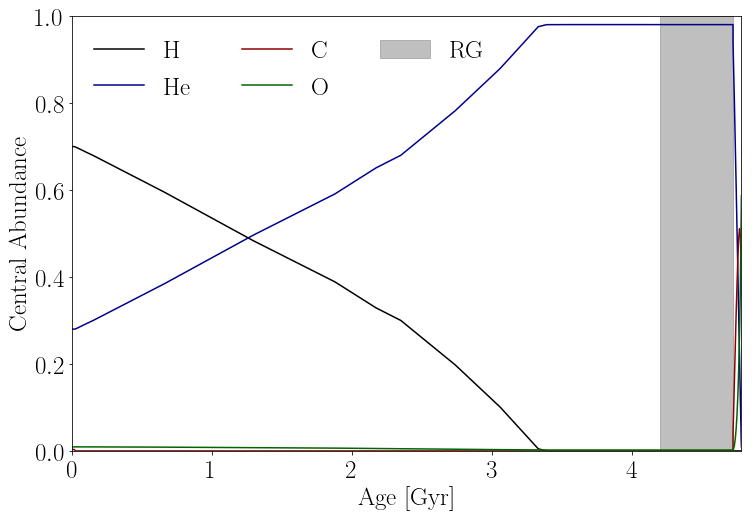

In [17]:
# HB_idxs = np.where((center_h < 1e-4) & (center_he < .99) & (center_he > 1e-2))
plt.figure(figsize=(12,8))
# log_yr_to_sn = -np.log(yr_to_sn)
plt.plot(star_age,center_h,label='H',color='black')
plt.plot(star_age,center_he,label='He',color='darkblue')
plt.plot(star_age,center_c,label='C',color='darkred')
plt.plot(star_age,center_o,label='O',color='darkgreen')
# plt.plot(star_age,center_ne,label='Ne')
plt.axvspan(star_age[mns_RG[0][0]],star_age[mns_RG[0][-1]],color='gray',alpha=0.5,label='RG')
# plt.yscale('log')
plt.xlabel('Age [Gyr]')
plt.xlim(0,star_age[-1])
plt.ylim(0,1)
# plt.xscale('log')
# plt.xlim(10**1,t_sn*10**6)
# plt.gca().invert_xaxis()
plt.ylabel('Central Abundance')
plt.legend(loc='upper left',ncol=3,frameon=0)

# # Additional plots:
# Surface abundances
# Mass, radius over time

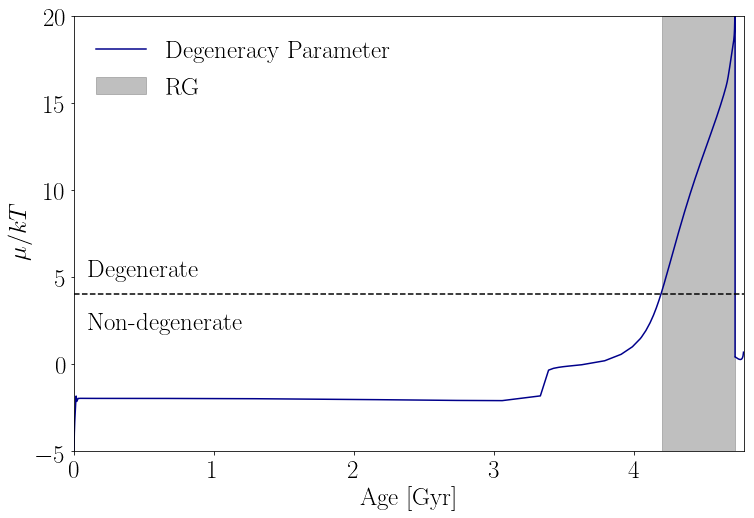

In [18]:
# HB_idxs = np.where((center_h < 1e-4) & (center_he < .99) & (center_he > 1e-2))
plt.figure(figsize=(12,8))
# log_yr_to_sn = -np.log(yr_to_sn)
plt.plot(star_age,eta,label='Degeneracy Parameter',color='darkblue')
plt.axvspan(star_age[mns_RG[0][0]],star_age[mns_RG[0][-1]],color='gray',alpha=0.5,label='RG')
plt.axhline(4,color='black',linestyle='--')
plt.text(0.1,5,'Degenerate')
plt.text(0.1,2,'Non-degenerate')
plt.xlabel('Age [Gyr]')
# plt.xscale('log')
# plt.xlim(10**1,t_sn*10**6)
# plt.gca().invert_xaxis()
plt.xlim(0,star_age[-1])
plt.ylim(-5,20)
plt.ylabel('$\mu/kT$')
plt.legend(loc='best',frameon=0)

# # Additional plots:
# Surface abundances
# Mass, radius over time

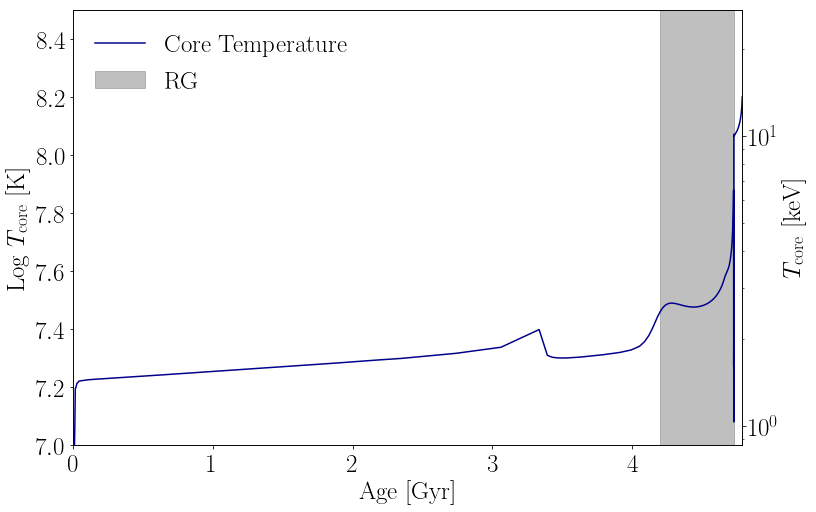

In [19]:
plt.figure(figsize=(12,8))
# plt.axvline(star_age[HB_idxs[0][0]],color='black',label='HB Start/End')
# plt.axvline(star_age[HB_idxs[0][-1]],color='black')
# plt.axvline(star_age[model_number_plot],color='black')
plt.plot(star_age,log_Tcore,color='darkblue',label='Core Temperature')
# plt.plot(yr_to_sn,log_Rhocore,label='Log $\\rho_{\\rm core}$ [g/cm$^{3}$]')
plt.axvspan(star_age[mns_RG[0][0]],star_age[mns_RG[0][-1]],color='gray',alpha=0.5,label='RG')
plt.xlabel('Age [Gyr]')
# plt.xscale('log')
# plt.xlim(10**1,t_sn*10**6)
# plt.gca().invert_xaxis()
plt.xlim(0,star_age[-1])
# plt.xlim(1.0,1.1)
plt.ylabel('Log $T_{\\rm core}$ [K]')
plt.ylim(7,8.5)
plt.legend(loc='best',frameon=0)
ax1 = plt.gca()
ax2 = ax1.twinx()
mn, mx = ax1.get_ylim()
logK2keV = .086/1e6
ax2.set_ylim(10**mn*logK2keV, 10**mx*logK2keV)
ax2.set_ylabel('$T_{\\rm core}$ [keV]')
ax2.set_yscale('log')

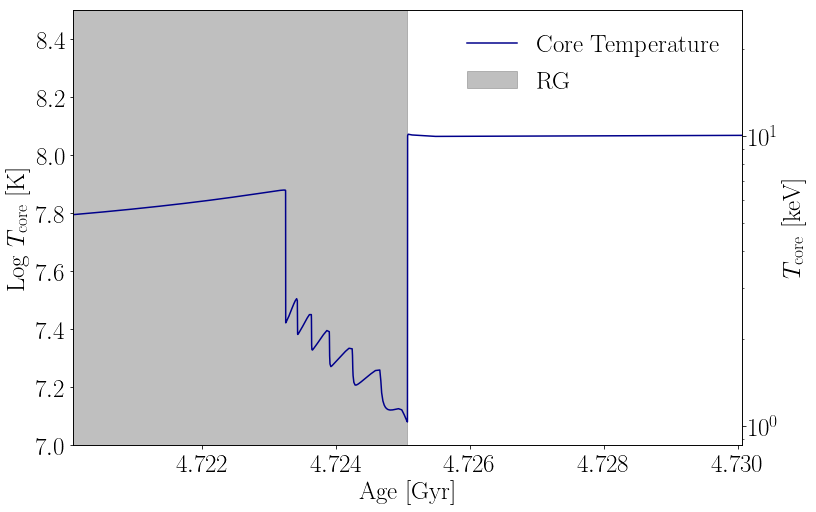

In [22]:
plt.figure(figsize=(12,8))
# plt.axvline(star_age[HB_idxs[0][0]],color='black',label='HB Start/End')
# plt.axvline(star_age[HB_idxs[0][-1]],color='black')
# plt.axvline(star_age[model_number_plot],color='black')
plt.plot(star_age,log_Tcore,color='darkblue',label='Core Temperature')
# plt.plot(yr_to_sn,log_Rhocore,label='Log $\\rho_{\\rm core}$ [g/cm$^{3}$]')
plt.axvspan(star_age[mns_RG[0][0]],star_age[mns_RG[0][-1]],color='gray',alpha=0.5,label='RG')
plt.xlabel('Age [Gyr]')
# plt.xscale('log')
# plt.xlim(10**1,t_sn*10**6)
# plt.gca().invert_xaxis()
plt.xlim(star_age[mns_RG[0][-1]]-0.5e-2,star_age[mns_RG[0][-1]]+0.5e-2)
# plt.xlim(1.0,1.1)
plt.ylabel('Log $T_{\\rm core}$ [K]')
plt.ylim(7,8.5)
plt.legend(loc='best',frameon=0)
ax1 = plt.gca()
ax2 = ax1.twinx()
mn, mx = ax1.get_ylim()
logK2keV = .086/1e6
ax2.set_ylim(10**mn*logK2keV, 10**mx*logK2keV)
ax2.set_ylabel('$T_{\\rm core}$ [keV]')
ax2.set_yscale('log')

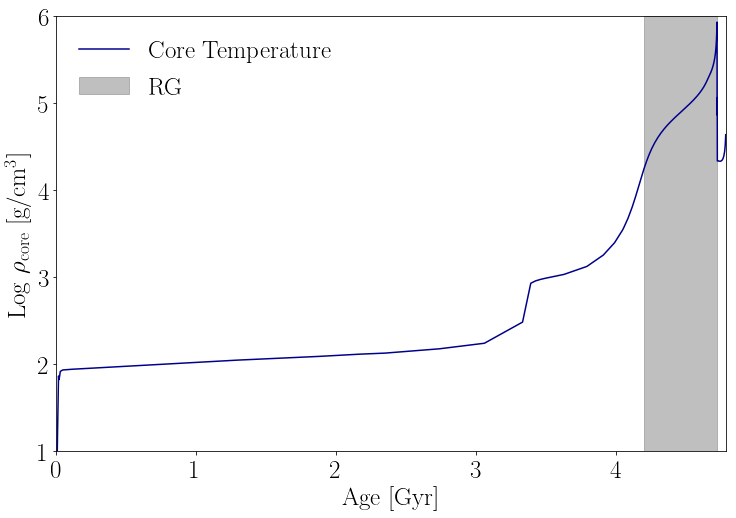

In [35]:
plt.figure(figsize=(12,8))
# plt.axvline(star_age[HB_idxs[0][0]],color='black',label='HB Start/End')
# plt.axvline(star_age[HB_idxs[0][-1]],color='black')
# plt.axvline(star_age[model_number_plot],color='black')
plt.plot(star_age,log_Rhocore,color='darkblue',label='Core Temperature')
# plt.plot(yr_to_sn,log_Rhocore,label='Log $\\rho_{\\rm core}$ [g/cm$^{3}$]')
plt.axvspan(star_age[mns_RG[0][0]],star_age[mns_RG[0][-1]],color='gray',alpha=0.5,label='RG')
plt.xlabel('Age [Gyr]')
# plt.xscale('log')
# plt.xlim(10**1,t_sn*10**6)
# plt.gca().invert_xaxis()
plt.xlim(0,star_age[-1])
# plt.xlim(1.0,1.1)
plt.ylabel('Log $\\rho_{\\rm core}$ [g/cm$^3$]')
plt.ylim(1,6)
plt.legend(loc='best',frameon=0)
ax1 = plt.gca()

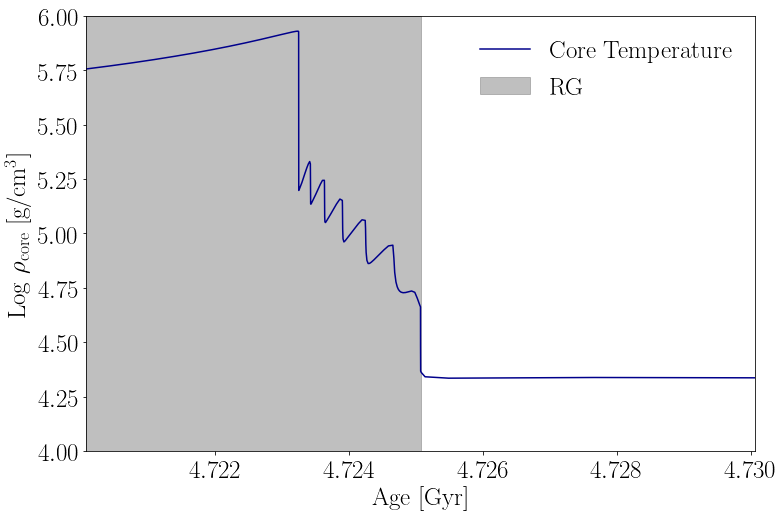

In [39]:
plt.figure(figsize=(12,8))
# plt.axvline(star_age[HB_idxs[0][0]],color='black',label='HB Start/End')
# plt.axvline(star_age[HB_idxs[0][-1]],color='black')
# plt.axvline(star_age[model_number_plot],color='black')
plt.plot(star_age,log_Rhocore,color='darkblue',label='Core Temperature')
# plt.plot(yr_to_sn,log_Rhocore,label='Log $\\rho_{\\rm core}$ [g/cm$^{3}$]')
plt.axvspan(star_age[mns_RG[0][0]],star_age[mns_RG[0][-1]],color='gray',alpha=0.5,label='RG')
plt.xlabel('Age [Gyr]')
# plt.xscale('log')
# plt.xlim(10**1,t_sn*10**6)
# plt.gca().invert_xaxis()
plt.xlim(star_age[mns_RG[0][-1]]-0.5e-2,star_age[mns_RG[0][-1]]+0.5e-2)
# plt.xlim(1.0,1.1)
plt.ylabel('Log $\\rho_{\\rm core}$ [g/cm$^3$]')
plt.ylim(4,6)
plt.legend(loc='best',frameon=0)
ax1 = plt.gca()

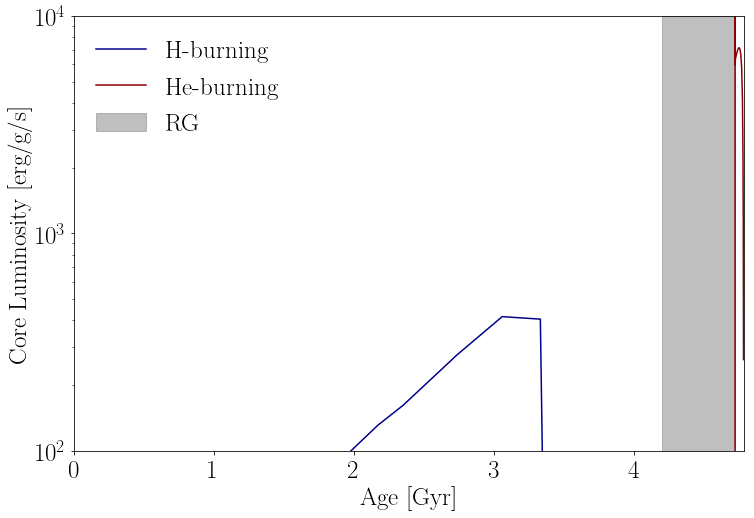

In [25]:
# HB_idxs = np.where((center_h < 1e-4) & (center_he < .99) & (center_he > 1e-2))
plt.figure(figsize=(12,8))
# log_yr_to_sn = -np.log(yr_to_sn)
plt.plot(star_age,10**log_Lcno,label='H-burning',color='darkblue')
plt.plot(star_age,10**log_L3alpha,label='He-burning',color='darkred')
plt.axvspan(star_age[mns_RG[0][0]],star_age[mns_RG[0][-1]],color='gray',alpha=0.5,label='RG')
plt.xlabel('Age [Gyr]')
# plt.plot(yr_to_sn,center_ne,label='Ne')
# plt.axvline(star_age[HB_idxs[0][0]],color='black',label='HB Start/End')
# plt.axvline(star_age[HB_idxs[0][-1]],color='black')
# plt.axvline(star_age[model_number_plot],color='black')
# plt.axvline(yr_to_sn[model_number_plot],color='black',label='Today')
# plt.xlim(1.07*10,1.095*10)
# plt.xlabel('Years before SN [yr]')
# plt.xscale('log')
plt.xlim(0,star_age[-1])
# plt.gca().invert_xaxis()
plt.ylim(1e2,1e4)
plt.yscale('log')
plt.ylabel('Core Luminosity [erg/g/s]')
plt.legend(loc='best',frameon=0)

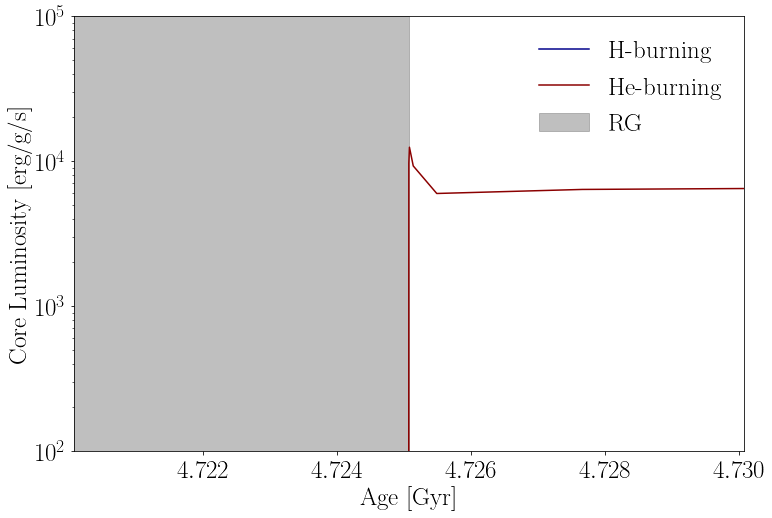

In [26]:
# HB_idxs = np.where((center_h < 1e-4) & (center_he < .99) & (center_he > 1e-2))
plt.figure(figsize=(12,8))
# log_yr_to_sn = -np.log(yr_to_sn)
plt.plot(star_age,10**log_Lcno,label='H-burning',color='darkblue')
plt.plot(star_age,10**log_L3alpha,label='He-burning',color='darkred')
plt.axvspan(star_age[mns_RG[0][0]],star_age[mns_RG[0][-1]],color='gray',alpha=0.5,label='RG')
plt.xlabel('Age [Gyr]')
# plt.plot(yr_to_sn,center_ne,label='Ne')
# plt.axvline(star_age[HB_idxs[0][0]],color='black',label='HB Start/End')
# plt.axvline(star_age[HB_idxs[0][-1]],color='black')
# plt.axvline(star_age[model_number_plot],color='black')
# plt.axvline(yr_to_sn[model_number_plot],color='black',label='Today')
# plt.xlim(1.07*10,1.095*10)
# plt.xlabel('Years before SN [yr]')
# plt.xscale('log')
plt.xlim(star_age[mns_RG[0][-1]]-0.5e-2,star_age[mns_RG[0][-1]]+0.5e-2)
# plt.gca().invert_xaxis()
plt.ylim(1e2,1e5)
plt.yscale('log')
plt.ylabel('Core Luminosity [erg/g/s]')
plt.legend(loc='best',frameon=0)

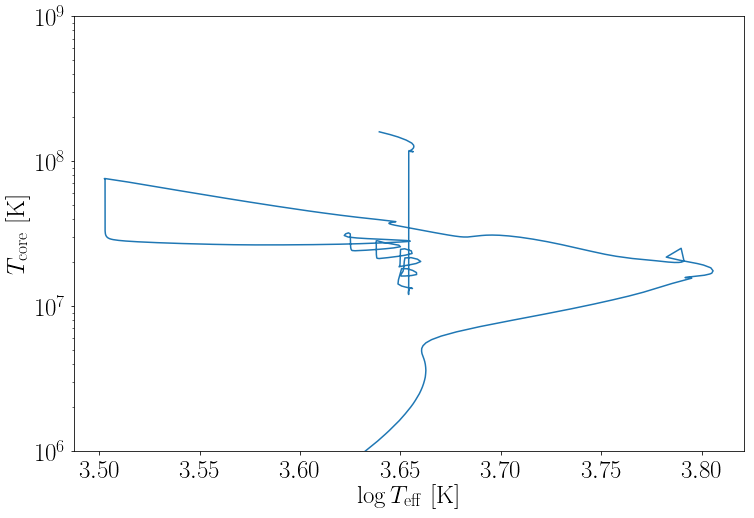

In [29]:
# HB_idxs = np.where((center_h < 1e-4) & (center_he < .99) & (center_he > 1e-2))
plt.figure(figsize=(12,8))
# log_yr_to_sn = -np.log(yr_to_sn)
plt.plot(log_Teff,10**log_Tcore)
plt.xlabel('$\log T_{\\rm eff}$ [K]')
# plt.xlim(star_age[mns_RG[0][-1]]-0.5e-2,star_age[mns_RG[0][-1]]+0.5e-2)
# plt.gca().invert_xaxis()
plt.ylim(1e6,1e9)
plt.yscale('log')
plt.ylabel('$T_{\\rm core}$ [K]')
plt.legend(loc='best',frameon=0)